In [1]:
# !pip install catboost

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [1]:
%pwd

'/Users/mansu/Desktop/공모전'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
import numpy as np

# os.chdir("/content/drive/My Drive/")
# os.chdir("/Users/mansu/Desktop/공모전")

# data = pd.read_csv("real_middle_df.csv", index_col = 0)
df = pd.read_csv("preprocessing_.csv", index_col = 0)

In [75]:
df.상품군.unique()

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구',
       '침구'], dtype=object)

In [64]:
df.head()

,노출(분),상품명,상품군,판매단가,취급액,월,일,시,분,요일,휴일,프라임,세일,결제유형,성별,원플원
방송일시,,,,,,,,,,,,,,,,
2019-01-01 06:00:00,20.0,테이트 셀린 니트,의류,39900,2099000.0,1,1,6,0,Tuesday,2,4,0,0,1,0
2019-01-01 06:00:00,20.0,테이트 셀린 니트,의류,39900,4371000.0,1,1,6,0,Tuesday,2,4,0,0,2,0
2019-01-01 06:20:00,20.0,테이트 셀린 니트,의류,39900,3262000.0,1,1,6,20,Tuesday,2,4,0,0,1,0
2019-01-01 06:20:00,20.0,테이트 셀린 니트,의류,39900,6955000.0,1,1,6,20,Tuesday,2,4,0,0,2,0
2019-01-01 06:40:00,20.0,테이트 셀린 니트,의류,39900,6672000.0,1,1,6,40,Tuesday,2,4,0,0,1,0


In [66]:
# del elec

# 가전

In [67]:
elec = df[df.상품군 == '가전']

In [70]:
elec['상품명'].unique()

array(['LG 세탁기', 'LG 냉장고', 'LG TV', '삼성 노트북', '삼성 TV',
       '삼성 블루스카이 공기청정기 AX40N3080DMD 1세트',
       '삼성 블루스카이 공기청정기 AX40N3080DMD 2세트', '삼성 건조기 블랙케비어 DV90M53B0QV',
       '삼성 건조기 DV90M53B0QW', '삼성 건조기 이녹스실버 DV90M53B0QP',
       '대우전자 미니건조기 DWR-03IDDC', '대우전자 미니건조기 DWR-03IDWH',
       '삼성 유로피안 냉장고 RS82M6000S8', 'LG 노트북 그램 15인치 15Z980-L.AR1DK',
       'LG 노트북 그램 15인치 15Z980-G.AR3DK', '삼성 국민TV',
       'LG 퓨리케어 공기청정기 AS281DAW', 'LG 퓨리케어 공기청정기 AS181DAW',
       'LG 코드제로 무선 무선청소기 A950 A958IA 더블팩',
       'LG 코드제로 무선 무선청소기 A940 A948SA 더블팩',
       'LG 코드제로 무선 무선청소기 A930 A938RA 싱글팩', 'LG 에어컨 홈멀티', 'LG 에어컨 스탠드',
       '삼성 블루스카이 공기청정기 7000 AX80R7580WDD', 'LG 에어컨 FQ17V9WW 스탠드',
       '삼성 홈 에어컨 AF16R5773WSR', '삼성 스탠드 에어컨 AF16R5773WSK',
       '삼성 5도어 냉장고 H9000 RH81M8011S9', '삼성 세탁기 W4N6781TG',
       'LG 스타일러 의류관리기 5벌 S5BB', 'LG 스타일러 의류관리기', '대우전자 벽걸이 에어컨',
       '캐리어 벽걸이 에어컨', '삼성 카드 5% LG TV', 'LG 에어컨 홈멀티 FQV9KWA2',
       'LG 에어컨 스탠드 FQV9KW', 'LG 휴대용 퓨리케어 미니 공기청정기',
       '삼성 무풍클래식 홈 에어

In [69]:
elec.상품명 = elec.상품명.str.replace('공청기', '공기청정기')
elec.상품명 = elec.상품명.str.replace('코드제로', '코드제로 무선')
elec.상품명 = elec.상품명.str.replace('무선 청소기', '무선청소기')

/Users/mansu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
세탁기, 냉장고 TV, 노트북, 공기청정기, 건조기, (미니건조기), 냉장고, 노트북, 청소기, 에어컨, 스타일러, 벽걸이 에어컨

In [45]:
elec.상품명

방송일시
2019-01-01 20:00:00    LG 세탁기
2019-01-01 20:00:00    LG 세탁기
2019-01-01 20:20:00    LG 세탁기
2019-01-01 20:20:00    LG 세탁기
2019-01-01 20:40:00    LG 세탁기
                        ...  
2019-12-31 21:20:00    LG 냉장고
2019-12-31 21:40:00    LG 냉장고
2019-12-31 21:40:00    LG 냉장고
2019-12-31 22:00:00    LG 냉장고
2019-12-31 22:00:00    LG 냉장고
Name: 상품명, Length: 5163, dtype: object

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer().fit(elec['상품명'].unique())
tfid.transform(elec['상품명'].unique()).toarray()
elec_voca = tfid.vocabulary_

In [72]:
elec_voca = dict(sorted(elec_voca.items(), reverse=True))
# elec_voca.pop('시카고커트러리5p세트',None) # 칼세트

In [73]:
elec_voca

{'휴대용': 104,
 '홈멀티': 103,
 '퓨리케어': 102,
 '푸드쇼케이스': 101,
 '파워모션': 100,
 '트롬': 99,
 '터보': 98,
 '코드제로': 97,
 '캐리어': 96,
 '카드': 95,
 '청소기': 94,
 '이녹스실버': 93,
 '의류관리기': 92,
 '유로피안': 91,
 '워블': 90,
 '에어컨': 89,
 '싱글팩': 88,
 '시카고커트러리5p세트': 87,
 '스피커': 86,
 '스탠드': 85,
 '스타일러': 84,
 '세탁기': 83,
 '선풍기': 82,
 '삼성': 81,
 '블루스카이': 80,
 '블랙케비어': 79,
 '북5nt550ebe': 78,
 '북5': 77,
 '복합기': 76,
 '벽걸이': 75,
 '미니건조기': 74,
 '미니': 73,
 '무풍클래식': 72,
 '무선청소기': 71,
 '무선': 70,
 '로보킹': 69,
 '딤채': 68,
 '더블팩': 67,
 '대우전자': 66,
 '노트북': 65,
 '냉장고': 64,
 '김치냉장고': 63,
 '그램': 62,
 '국민tv': 61,
 '공기청정기': 60,
 '건조기': 59,
 'w4r6360bg': 58,
 'w4n6781tg': 57,
 'vc44mb': 56,
 'tv': 55,
 't9000': 54,
 's5bb': 53,
 'rs82m6000s8': 52,
 'rh81r8011g2': 51,
 'rh81m8011s9': 50,
 'rh16wn': 49,
 'rh14wn': 48,
 'rf84r9203s8': 47,
 'rf84r9003s8': 46,
 'r46rim': 45,
 'nt550ebe': 44,
 'lg': 43,
 'ldl22dhwjj': 42,
 'k38b': 41,
 'k34w': 40,
 'h9000': 39,
 'fqv9kwa2': 38,
 'fqv9kw': 37,
 'fq17v9ww': 36,
 'dwr': 35,
 'dv90m53b0qw': 34,
 'dv90m5

In [54]:
if (elec.상품명 == '트롬')=1:
    display(elec.상품명)

SyntaxError: invalid syntax (<ipython-input-54-f6c03d2a515f>, line 1)

# 의류

In [76]:
clo = df[df.상품군 == '의류']

In [99]:
print(len(clo['상품명'].unique()))
clo['상품명'].unique()

201


array(['테이트 셀린 니트', 'CERINI_by_PAT 소프트 기모 릴렉스 팬츠', '보코 리버시블 무스탕',
       'CERINI_by_PAT 풀 패키지 기모 니트', '그렉노먼 구스다운 롱 벤치 코트', '마리노블 밍크 롱 코트',
       '헤스티지 엘레나 라쿤양가죽 콤비 롱 코트', '그렉노먼 캐시터치 터틀넥', 'NNF 쿠션퍼자켓 + 베스트',
       '아문센 윈터 하드쉘 세트', '마담팰리스 웜 기모 롱베스트 세트', 'K-SWISS 기모 티셔츠',
       '아리스토우 기모 티셔츠', '도네이 터틀넥 스웨터', '테이트 기모 티셔츠', '보코 폭스퍼구스다운 롱패딩',
       '더블유베일 폭스카라 머스크랫 코트', '로이몬스터 남녀 벤치후드롱패딩', '아리스토우 패딩 트랙수트 세트',
       '임페 릴렉스 본딩 팬츠', '보코 퀼팅베스트 + 터틀넥', '메시제이 퀼팅 코트  + 퍼베스트',
       '임페 울 블렌딩 니트', '보코 윈터 기모 풀코디 세트', 'NNF 롱패딩', '크리스티나앤코 기모 티셔츠 세트',
       '보코 니트 웨어 풀코디', '더블유베일 캐시라이크 니트', 'CERINI_by_PAT 집업 니트',
       'K-SWISS 약 기모 팬츠', '루이바셋 기모 웜 본딩 팬츠', '마리노블 밍크 퍼 베스트',
       'NNF 더블페이스 쿠션자켓 + 베스트', '크리스티나앤코 가디건세트', '보코 기모 퀼팅 패딩',
       '그렉노먼 봄 컬렉션 티셔츠', '에르나벨 체크배색 데일리 트렌치코트', '헤스티지 양가죽 코트',
       '헤스티지 마론 양가죽 집업자켓', '그렉노먼 디보티 컬렉션 트렌치코트', '보코 울 코트',
       'NNF 소프트 베스트 앙상블', '엔셀라두스 밴딩 팬츠', 'NNF S/S 트레이닝 세트',
       'CERINI_by_PAT 스프링 릴렉스 팬츠', '헤비추얼 이지라이프 데님', '뱅뱅 봄 데님',
       '테이트 S/S 트렌

In [98]:
# clo.상품명 = clo.상품명.str.replace('+', ' + ')
# clo.상품명 = clo.상품명.str.replace('트렌치 코트', '트렌치코트')
# clo.상품명 = clo.상품명.str.replace('폴로셔츠', '폴로 셔츠')
# clo.상품명 = clo.상품명.str.replace('재킷', '자켓')
# clo.상품명 = clo.상품명.str.replace('수트 + 베스트', '정장')
# clo.상품명 = clo.상품명.str.replace('후드롱구스다운 코트', '후드롱구스다운')

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer().fit(clo['상품명'].unique())
tfid.transform(clo['상품명'].unique()).toarray()
clo_voca = tfid.vocabulary_


In [101]:
clo_voca = dict(sorted(clo_voca.items(), reverse=True))

In [102]:
clo_voca

{'후드롱구스다운': 236,
 '후드': 235,
 '화이트라벨': 234,
 '헤스티지': 233,
 '헤비추얼': 232,
 '핫멜트': 231,
 '하프': 230,
 '하이넥': 229,
 '하드쉘': 228,
 '피치': 227,
 '플리스': 226,
 '플렉스': 225,
 '프린트': 224,
 '풍기인견': 223,
 '풀코디': 222,
 '풀오버': 221,
 '폴로': 220,
 '폭스퍼후드': 219,
 '폭스퍼구스다운': 218,
 '폭스카라': 217,
 '폭스': 216,
 '페플럼제이': 215,
 '퍼포먼스': 214,
 '퍼베스트': 213,
 '팬츠': 212,
 '패키지': 211,
 '패션': 210,
 '패딩점퍼': 209,
 '패딩자켓세트': 208,
 '패딩': 207,
 '팜스프링스': 206,
 '판초': 205,
 '티셔츠': 204,
 '티블라우스': 203,
 '트렌치코트': 202,
 '트렌치자켓': 201,
 '트렌치': 200,
 '트레이닝': 199,
 '트랙수트': 198,
 '트랙': 197,
 '통풍': 196,
 '테일러드롱자켓': 195,
 '테이트': 194,
 '터틀넥': 193,
 '타운젠트': 192,
 '크리스티나앤코': 191,
 '크롭': 190,
 '크롬': 189,
 '퀼팅자켓': 188,
 '퀼팅베스트': 187,
 '퀼팅롱': 186,
 '퀼팅': 185,
 '쿨썸머': 184,
 '쿨라이프': 183,
 '쿨라이트': 182,
 '쿠션퍼자켓': 181,
 '쿠션자켓': 180,
 '콤비': 179,
 '코펜하겐럭스': 178,
 '코팅': 177,
 '코튼블렌딩': 176,
 '코튼': 175,
 '코트': 174,
 '코몽트': 173,
 '컴포트': 172,
 '컬렉션': 171,
 '캐주얼': 170,
 '캐시터치': 169,
 '캐시라이크': 168,
 '카타': 167,
 '카라': 166,
 '체크배색': 165,
 '집업자켓': 164,
 '집업': 163

# 속옷

In [3]:
und = df[df.상품군 == '속옷']

In [4]:
print(len(und['상품명'].unique()))
und['상품명'].unique()

165


array(['오모떼 레이스 파운데이션 브라', '크로커다일 The 편안한 코튼 브라 팬티 4세트',
       '오모떼 360도 텐션업 레이스 패키지', '푸마 에어핏 서포트 브라세트 +',
       '로베르타_디_까메리노 올레이스 지퍼 브라 팬티', '레이프릴 무빙 맥시풀커버 브라 팬티',
       '푸마 코튼 라이크라 드로즈', '푸마 심리스 롱드로즈', '푸마 드라이셀라인 뉴 런닝',
       '크로커다일 풀커버 레이스 브라 팬티 4세트', '푸마 웜셀 기모 치마레깅스', '푸마 심리스 드로즈',
       '푸마 NEW 트렁크 패키지', '로베르타_디_까메리노 360커브드 지퍼 쉐이핑 란쥬', '오모떼 브라',
       '레이프릴 더블엑스 매직니퍼팬티 FW리뉴얼', '쿠미투니카 하이서포트 심리스 란쥬&팬티',
       '에버라스트 기능성 에어로웜 동내의 3세트', '카파 드로즈 패키지', '카파 런닝 패키지',
       '쿠미투니카 황후의코르셋 하이웨이스트팬티 리뉴얼', '카파 발란스테크 브라 팬티 12세트',
       '로베르타_디_까메리노 트리플커버 지퍼 쉐이핑 란쥬', '몬테밀라노 어메이징핏 하이웨스트 팬티',
       '오모떼 스킨 쉐이핑 브라 팬티', '컬럼비아 드로즈 패키지', '컬럼비아 롱드로즈 패키지',
       '컬럼비아 머슬 언더셔츠', '남영비비안 스킨핏 Dream Fit 브라 팬티', '헤스떼벨 웜 업 란쥬쉐이퍼',
       '레이프릴 무빙 맥시풀커버 브라 팬티 리뉴얼', '오모떼 에어홀릭 브라 팬티', '레이프릴 골드라벨 무빙 란쥬',
       '아키 조끼형 더블보정 란쥬 쉐이퍼', '푸마 심리스 드로즈 블랙 패키지', '푸마 트렁크 블랙 패키지',
       '몬테밀라노 컴포트앤핏 브라 팬티 5+5세트', '푸마 드라이셀 퓨징 브라세트 패키지',
       '푸마 드라이셀 쉐이핑 레깅스', '푸마 드라이셀 치마레깅스', '오모떼 미라클 쉐이핑 브라 팬티',
       '쿠미투니카

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer().fit(und['상품명'].unique())
tfid.transform(und['상품명'].unique()).toarray()
und_voca = tfid.vocabulary_

und_voca = dict(sorted(und_voca.items(), reverse=True))

In [109]:
und_voca

{'힐링': 221,
 '히팅': 220,
 '히트융': 219,
 '히트모': 218,
 '후크': 217,
 '황후의코르셋': 216,
 '황후의': 215,
 '홈웨어세트': 214,
 '홈웨어': 213,
 '홀리데이': 212,
 '헤스떼벨': 211,
 '헤드': 210,
 '하이웨이스트팬티': 209,
 '하이웨스트': 208,
 '하이서포트': 207,
 '프리컷': 206,
 '프리미엄': 205,
 '프리무빙': 204,
 '프론트': 203,
 '퓨징': 202,
 '풍기인견': 201,
 '풀코디': 200,
 '풀컵': 199,
 '풀커버리지': 198,
 '풀커버': 197,
 '푸마': 196,
 '편안한': 195,
 '퍼펙트클린': 194,
 '퍼펙트': 193,
 '퍼치마레깅스': 192,
 '팬티': 191,
 '패키지': 190,
 '파운데이션': 189,
 '티셔츠형': 188,
 '트리플커버': 187,
 '트렁크': 186,
 '투홀릭': 185,
 '텐션업': 184,
 '크루즈': 183,
 '크로커다일': 182,
 '쿨메쉬': 181,
 '쿨란쥬': 180,
 '쿠미투니카': 179,
 '코튼': 178,
 '코몽트': 177,
 '코르셋': 176,
 '컴포트핏': 175,
 '컴포트앤핏': 174,
 '컴포트': 173,
 '컬렉션': 172,
 '컬럼비아': 171,
 '캐리어': 170,
 '카파': 169,
 '치마레깅스': 168,
 '지퍼란쥬': 167,
 '지퍼': 166,
 '주니어': 165,
 '조끼형': 164,
 '저스트마이사이즈': 163,
 '이지탑': 162,
 '이지웨어세트': 161,
 '이지웨어': 160,
 '이너웨어': 159,
 '이너쇼츠': 158,
 '웜웨어': 157,
 '웜셀': 156,
 '웜기모': 155,
 '원피스': 154,
 '완벽더블': 153,
 '와이드': 152,
 '올레이스': 151,
 '오모떼': 150,
 '오리지널': 149,
 '오렐리안'

# 농수축

In [5]:
food = df[df.상품군 == '농수축']
print(len(food['상품명'].unique()))
food['상품명'].unique()

124


array(['뽕셰프 이봉원 특갈비탕', '국내산 손질 오징어', '쌀', '손질 왕꼬막', '용대리황태', '고등어',
       'SPC삼립 한입 호빵 13봉 혼합, 팥8+야채5봉', 'SPC삼립 한입 호빵 13봉 단일, 팥 13봉',
       '바다먹자 국내산 손질 꽃게', '국내산 손질 대구 * 매운탕 양념', '천연담아 명품다시팩', '완도활 전복',
       '영산포숙성 홍어+무침3통', '소 갈비탕', 'a4 팽현숙의 순대 곱창 전골&볶음', '농협안심벌꿀 4병',
       '더 맛있는 NEW 돼지왕구이', '천수봉명인 선재 전통 메주세트', '제주 한라봉+천혜향',
       '궁중 손질 새우 + 동태포', '이봉원 정직한 안창살 + 갈비살구이', '농협 대학 찰 옥수수 10봉',
       '전철우 소갈비살구이', '수협 자연산 제주 옥돔 + 갈치 세트', 'AAE LA갈비', '제주바다 7분 손질 문어',
       '쥐포', '구워만든 곡물그대로 21, 20봉', '구워만든 곡물그대로 21, 오리지널 10봉',
       '완도활 전복 中사이즈', '장보고 완도매생이', '자연산 손질 오징어',
       '강원도양구 간편시래기 + 시래기 들깨 무침', '캘리포니아 카라카라 오렌지', '김정문의 섬진강 재첩국',
       '완도활 전복 大사이즈', '국내산 특大 손질 오징어', '바다먹자 국내산 손질 문어', '영산포숙성 홍어',
       '이만기의 국밥', '본죽 그때 쇠고기 장조림 세트', '국내산 손질 꽃게', '속초명물 티각태각 부각 , 30봉',
       '모시떡 !!', '모시떡 +찰보리식혜', '김치+김치', '최인선 셰프의 듬뿍 곤드레나물밥 16인분',
       '국내산 손질 가자미 !', '바다원 더 그릴 아구채+양태채+쥐포채 + 소스', '소곱창전골',
       '완도활 전복 세트 +간장 전복 장2통', '맛있는 제주 손질 생선 3대세트 광어 + 갈치 + 고등어',
       '맛있

# 생활용품

In [6]:
liv = df[df.상품군 == '생활용품']
print(len(liv['상품명'].unique()))
liv['상품명'].unique()

140


array(['벨라홈 논슬립 옷걸이 세트', '비데', '코이모 리빙박스', '스위스밀리터리 전동공구세트',
       '메디쉴드 자동 목 견인기기', '씨엔지코리아 방역용마스크 킹 F94 60매', '크린조이 황사 방역마스크  105매',
       '크린조이 황사 방역마스크 소형 105매', '가 세렌셉템버 다이아 체크 리빙박스+압축팩', '까사마루행거 2단',
       '벨라홈 릴렉스 체어', '바로바로 무선 청소기', '올바로바른자세밴드 세트', '금고', '김병만의 달인 공구 세트',
       '코튼데이 유기농 순면 마스크 킹 F94 60매', 'LG 생활건강 테크 한장빨래 화이트업 30매X',
       '굿프렌드 굿터치클리너', '올뉴 숀리 스쿼트머신', '스피드랙 베이직 4단', '김병만의 정글피싱 낚시세트',
       '김병지 거미손 풀확장 일체형 코일카매트', 'LG 생활건강 건조기 시트 퍼퓸드몽드',
       '메디컬드림 롤링마사지기 킹 MD-970', '모리츠 에어 서큘레이터', '거미손 차량용 공기청정기',
       '한일 자동 빨래 삶통 BW-700', '완벽더블구성 바로톡 싱크대 거름통', '기본구성 바로톡 싱크대 거름통',
       '디비노 선글라스 세트', '대웅모닝컴 굿템 스탠드선풍기2대', '이지스 자외선 마스크 세트',
       '배관청소용품 뚜러킹 세트', '파격가 비데', '자미코코 3단 매트릭스 싱글', '자미코코 3단 매트릭스 더블',
       '무선 예초기', '무선 예초기+배터리', '바로바로 무선 청소기+필터 추가', '3D매쉬 냉수마찰 물매트',
       '도루코 페이스5 면도기 세트 세트', '도루코 페이스5 면도기 세트 1세트', '도루코 페이스5 면도날 입',
       '노송가구 제이드 비취 교자상 600', '노송가구 제이드 비취 교자상 800',
       '노송가구 제이드 비취 교자상 900', '노송가구 제이드 비취 꽃상감 교자상 900',
       '

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer().fit(liv['상품명'].unique())
temp = tfid.transform(liv['상품명'].unique()).toarray()

cols = tfid.get_feature_names()
data = pd.DataFrame(temp, columns=cols)

# liv_voca = tfid.vocabulary_
# liv_voca = dict(sorted(liv_voca.items(), reverse=True))

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=10000, verbose=1)

In [40]:
Z = tsne.fit_transform(data.T)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 289 samples in 0.005s...
[t-SNE] Computed neighbors for 289 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 0.274350
[t-SNE] KL divergence after 250 iterations with early exaggeration: 126.068085
[t-SNE] KL divergence after 10000 iterations: 1.818814


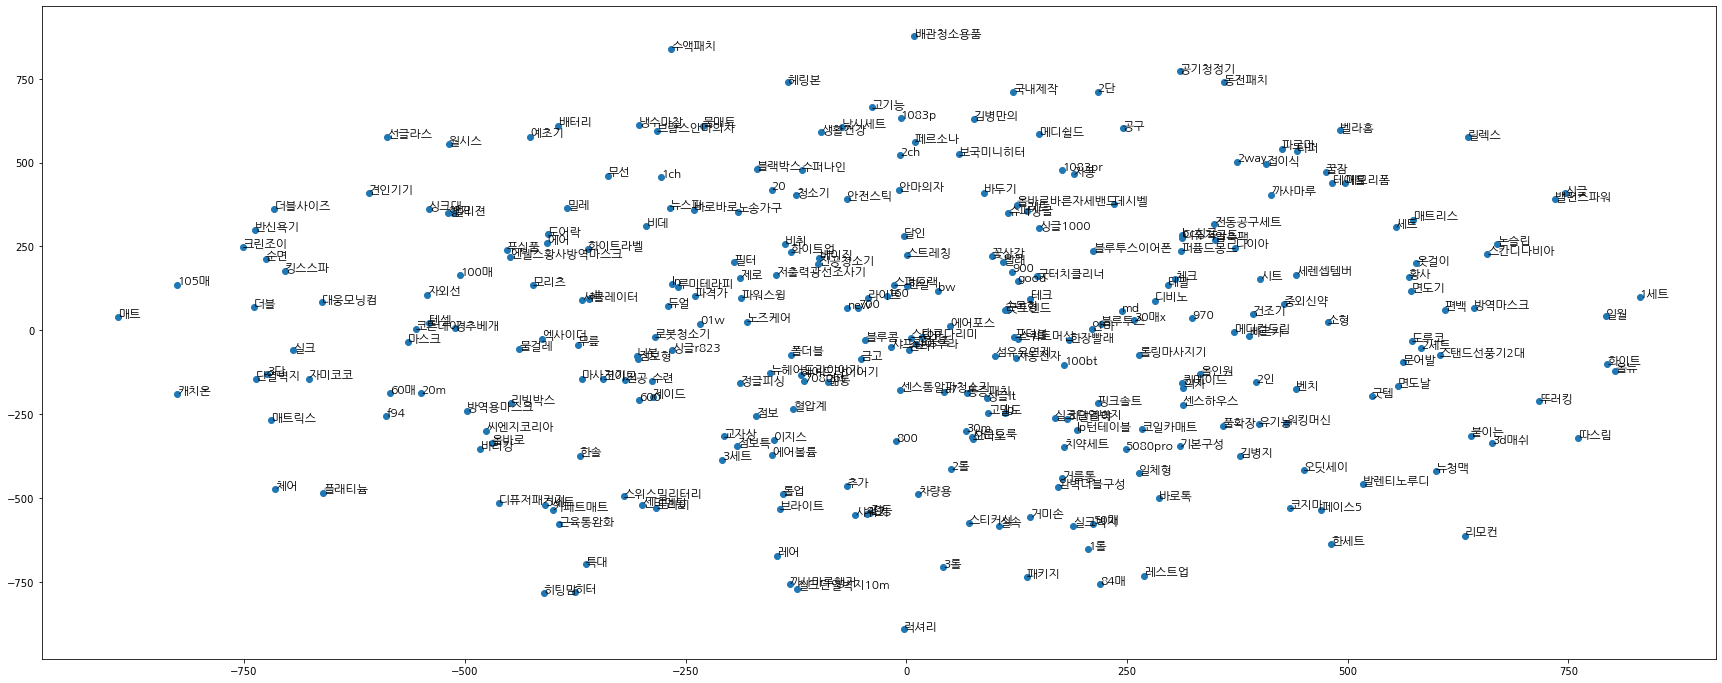

In [41]:
import matplotlib.pyplot as plt
path = '/Users/mansu/Library/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

plt.scatter(Z[:,0], Z[:,1])
for i in range(len(cols)):
    plt.annotate(s=cols[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()


fig = plt.gcf()
fig.set_size_inches(30,12)
fig.savefig('test2png.png', dpi=100)  

글렀군..

In [42]:
brand = pd.read_csv("0924_ver.csv")

In [44]:
brand['브랜드'].head()

0    테이트
1    테이트
2    테이트
3    테이트
4    테이트
Name: 브랜드, dtype: object

In [49]:
brand[brand.상품군 == '생활용품'].브랜드.unique()
print(len(brand[brand.상품군 == '생활용품'].브랜드.unique()))

65


In [48]:
liv_voca

{'히팅맘': 288,
 '히터': 287,
 '히말라야': 286,
 '황사': 285,
 '화이트업': 284,
 '화이트라벨': 283,
 '화이트': 282,
 '혈압계': 281,
 '헤어드라이어기': 280,
 '헤링본': 279,
 '행거': 278,
 '한장빨래': 277,
 '한일': 276,
 '한솔': 275,
 '한세트': 274,
 '핑크솔트': 273,
 '필터': 272,
 '플래티늄': 271,
 '풀확장': 270,
 '푸쉬풀': 269,
 '폴더블': 268,
 '포터블': 267,
 '편백': 266,
 '페이스5': 265,
 '페르소나': 264,
 '퍼퓸드몽드': 263,
 '패키지': 262,
 '파워스윙': 261,
 '파로마': 260,
 '파격가': 259,
 '특대': 258,
 '트라이': 257,
 '통증패치': 256,
 '텐셀': 255,
 '테팔': 254,
 '테크': 253,
 '테이블': 252,
 '타퍼': 251,
 '킹스스파': 250,
 '크린조이': 249,
 '퀸메이드': 248,
 '코튼데이': 247,
 '코지마': 246,
 '코일카매트': 245,
 '코이모': 244,
 '캐치온': 243,
 '카페트매트': 242,
 '치약세트': 241,
 '추가': 240,
 '체크': 239,
 '체어': 238,
 '청소기': 237,
 '차량용': 236,
 '진공청소기': 235,
 '진공': 234,
 '중외신약': 233,
 '제이드': 232,
 '제로': 231,
 '정글피싱': 230,
 '접이식': 229,
 '점보형': 228,
 '점보특': 227,
 '점보': 226,
 '전등': 225,
 '전동공구세트': 224,
 '저출력광선조사기': 223,
 '자외선': 222,
 '자미코코': 221,
 '자동전자': 220,
 '자동': 219,
 '일체형': 218,
 '일월': 217,
 '이지스': 216,
 '의자': 215,
 '유기농': 214,
 '월시스':

# 건강기능

In [50]:
health = df[df.상품군 == '건강기능']
print(len(health['상품명'].unique()))
health['상품명'].unique()

39


array(['직매입 종근당건강 아이클리어 루테인', '제주농장 유기 양배추진액', '종근당건강 전립쎈 프라임', '베지밀 두유',
       '한삼인순홍삼진 백', '종근당건강 프로메가 오메가3 파워', '특집 이롬 황성주1일1생식 스페셜',
       '통째로 착즙한 루비 석류즙', '닥터 슈퍼 루테인', '여자를 위한 빨강 팥물, 레드빈 티톡',
       '종근당건강 락토핏 생유산균', '네페르티티 유기농 퀸 석류즙', '밀싹 클렌즈 , 8주분! + 전용보틀',
       '경남제약 레모나 S산', '종근당건강 락토핏 생유산균골드', '뉴질랜드 초록입홍합 환 100%',
       '뉴트리원 다이어트 구미', '" 100% 착즙 석류 ",', '닥터 프리바이오틱스 플러스',
       '광동제약 석류 100,', ' 종근당건강 프로메가 오메가3 파워+비타민D', '이경제의 황제진액 철갑상어',
       '티젠 히비스커스 분말', '광동 장건강엔 생유산균', '100%착즙석류', '프리바이오틱스 3300 월분',
       '모나코사놀', '니파팜 해죽순', '정직한 농부의 석류', '무농약레드비트즙 90봉',
       '한국인 모유유래 다이어트 유산균 BNR17 비에날씬 12주', '안국루테인 미니100',
       '이경제의 레드비트 착즙 100%,', '서울대 더 신바이오틱스 월분', '블랙모어스 알티지 오메가3 3병 53주분',
       '콜라겐3.2 아임파인 월', '뉴트리원 전지현 베리솔 콜라겐 구미 더블24주분+6일분',
       '뉴트리원 전지현 베리솔 콜라겐 구미 12주분+3일분', '뉴트리원 비비랩 FOS 프리바이오틱스'],
      dtype=object)